# L01: Intro

Thomas

# L01: Modules and Classes

L01: Modules and Classes consisted of getting familiar with Python and learning how to use modules and classes.<br>
During the exercise we will be writing our own module and classes.

### Qa:

For this part of the assignment we will be using the module `libitmal` which is provided as part of the course.<br>
It is assumed that the module directory has been successfully added to the `PYTHONPATH`. On Linux this can be done by running `export PYTHONPATH="<module-dir>:$PYTHONPATH"`. If a `venv` is being used this can be added to the `activate` script.

The assignment consisted of running the `utils.TestAll()` function from the `libitmal` library. The function has been successfully ran below.

In [4]:

from libitmal import utils
utils.TestAll()

TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


### Qb:

In this exercise a new module had to be created with dummy functionality.<br>
This was achieved by creating a new folder called `libdummymodule`, adding an empty `__init__.py` file. This module was added to the `PYTHONPATH` like in exercise Qa.<br>
An extra file called `hello_world` was made which included a function: `hello_world(number)`. From the docstring of the function it can be read that the function prints "Hello, World!" `number` amount of times.

The function is tested below.

In [5]:
from libdummymodule.hello_world import hello_world
hello_world(2)

Hello, World!
Hello, World!


### Qc:

Jupyter does not recompile the modules every time it is used in a cell-code. Instead it uses a cached version of it. Question c asked how one can force a recompilation of a module for situations where the module had been changed.

The method we found the easiest was to simply restart the Jupyter kernel by pressing the restart symbol in the top menu. However, there are also some "magic lines" that ships with IPython¹ that can be used to reload a given module when a code cell is ran.


-------------------
¹ IPython is a dependency that Jupyter ships with.

### Qd (OPTIONAL):

Question d asked to write a small how-to guide on how moduels in Python works.

1. Make sure the path you're creating the module in is in your `$PYTHONPATH`
    * If using a venv you can add `export PYTHONPATH="<module-dir>":$PYTHONPATH` at the bottom of your .venv/activate file.
1. Create the folder and an empty file called __init__.py
1. Write your files.


### Qe:

The first part of question e consisted on answering some concrete questions:

*How are private function and member variables represented in python classes?*<br>
Private does not exist in Python. Instead there is a convention of adding `__` as a prefix of the method or member variable. If trying to access a method or member variable prefixed with `__` an `AttributeError` will be raised.

*What is the meaning of `self` in python classes?* <br>
It's a reference to the specific instance of the class. Comparable to the `this` pointer in C++.

*What happens to a function inside a class if you forget `self` in the parameter list, like `def myfun():` instead of `def myfun(self):` and you try to call it like `myobjectx.myfun()`? Remember to document the demo code and result.* <br>
It becomes a static function. See `my_static_fun()` below.

The second part consisted of extending a very simple class with some extra functionality. Some private and public members and functions had to be added.


In [6]:
class MyClass:
    myvar = "blah"
    __priv_var = "I can't stop you from using this var, but you probably shouldn't."

    def __priv_fun(self):
        print("I can't stop you from using this function, but you probably shouldn't.")

    def fun(self):
        print("This is a message inside the class.")

    def static_fun():
        print("I cannot be called from an instantiated object.")

    def get_priv_var(self):
        return MyClass.__priv_var

myobjectx = MyClass() # Making new obj
myobjectx.fun() # Calling member function

try:
    myobjectx.static_fun() # Trying to call static func on instantiated object raises error
except TypeError as e:
    print(f"TypeError: {e}")

MyClass.static_fun() # Calling static func correctly.

print(myobjectx.myvar) # printing public object

try:
    print(myobjectx.__priv_var) # Trying to print private member variable raises error
except AttributeError as e:
    print(f"AttributeError: {e}")

print(myobjectx.get_priv_var()) # Getting a private member variable.

try:
    myobjectx.__priv_fun() # Trying to call private func raises error
except AttributeError as e:
    print(f"AttributeError: {e}")


This is a message inside the class.
TypeError: static_fun() takes 0 positional arguments but 1 was given
I cannot be called from an instantiated object.
blah
AttributeError: 'MyClass' object has no attribute '__priv_var'
I can't stop you from using this var, but you probably shouldn't.
AttributeError: 'MyClass' object has no attribute '__priv_fun'


### Qf:
For this exercise the class from exercise Qe will be extended further. A constructor will be added. See the code cell below.

The exercise also asks whether or not destructors exist in Python and what purpose they might have.<br>
In Python the destructors do exist but are not used as much as in C++. In C++ destructors are usually used for de-allocating dynamically allocated memory. Pythons garbage collection handles this automatically. It is however possible to specify a `__del__` function to add destructor functionality, but it is not as widely used.


In [7]:
class MyBetterClass(MyClass): # Extending the class (inheritance)
    def __init__(self):
        print("I now have a CTOR!!!")

my_better_object = MyBetterClass()

I now have a CTOR!!!


### Qg:

This exercise asks to extend the class even further by adding a `to_string` functionality to our class as it is known in C++ and C#. This is done through the `__str__` function. Se code cell below.

In [8]:
class EvenBetterClass(MyBetterClass):
    def __str__(self): # String representation. 
        return "I am the string representation of an even better class!"

my_even_better_object = EvenBetterClass()
print(my_even_better_object)

I now have a CTOR!!!
I am the string representation of an even better class!


# L02: Cost function

Christoffer

# L02: Dummy classifier

Christoffer

# L02: Performance metrics

Thomas

# L03: Pipelines

L03: Pipelines consisted of learning how preprocessing data for certain ML models can be necessary and how to use pipelines in Sklearn.

The introduction of L03: Pipelines consisted of a lot of information and some code snippets. This has been left out of this notebook.

The code cell below imports numpy and matplotlib. It also loads the pickle file `itmal_l01_data.pkl`, which contains the OECD data from L01: Intro.

In [9]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def LoadDataFromL01():
    import pickle
    filename = "Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


The code cell below will define the function `PlotModels` that will be used later in the exercise. It will also make an `MLPRegressor` (Multi-layer Perceptron regressor) which will have a terrible score because the data data has not been been preprocessed.

The MLP mis-fits the data, seen in the bad R^2 score..
lin.reg.score(X, y)=0.73
MLP.score(X, y)=-18.44
OK


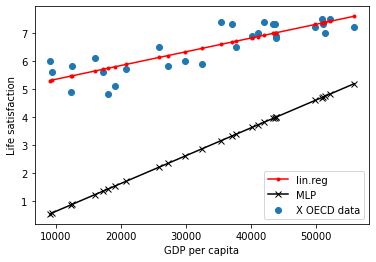

In [10]:
# Setup the MLP and lin. regression again..

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

def PlotModels(model1, model2, X, y, name_model1="lin.reg", name_model2="MLP"):

    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model1, model2, X, y):
        y_pred_model1 = model1.predict(X)
        y_pred_model2 = model2.predict(X)

        # call r2
        score_model1 = r2_score(y, y_pred_model1)
        score_model2 = r2_score(y, y_pred_model2)

        return y_pred_model1, y_pred_model2, score_model1, score_model2

    y_pred_model1, y_pred_model2, score_model1, score_model2 = CalcPredAndScore(
        model1, model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    print(f"{name_model1}.score(X, y)={score_model1:0.2f}")
    print(f"{name_model2}.score(X, y)={score_model2:0.2f}")


# lets make a linear and MLP regressor and redo the plots

mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP mis-fits the data, seen in the bad R^2 score..")
PlotModels(linreg, mlp, X, y)

print("OK")

### Qa:

The first exercise consisted of implementing a custom version of the `MinMaxScaler` that has the same functionality but is done "manually". Our MinMaxScaler can be seen below, where it is also tested against the `MinMaxScaler` that ships with Sklearn.

From the code cell below it can be seen that our MinMaxScaler first checks that the input `v` is either a `list` or a `numpy.array`. Then it gets the minimum and maximum values from `v` and stores them in `min` and `max`. A new `list` is then generated that has been scaled based on the minimum and maximum. This is by iterating over `v` and by subtracting `min` from every `item`. This value is then divided by `max-min` and appended to the new vector `v_new`, which will be returned.

The small test at the bottom of the cell confirms that the functionality is practically identical, since the statement `fabs(myMinMaxS[i]-sklearnMinMaxS[i])<eps` never returns `True`. The statement `fabs(myMinMaxS[i]-sklearnMinMaxS[i])<eps` checks if the values differ between our MinMaxScaler and Sklearn's MinMaxScaler.


In [12]:
from sklearn.preprocessing import MinMaxScaler
from numpy import fabs

def MyMinMaxScaler(v):
    if isinstance(v, (type(list), type(np.array))):
        raise TypeError('input must be list or np.array')
    min = np.min(v)
    max = np.max(v)
    v_new = []
    for item in v:
        v_new.append((item-min)/(max-min))
    return v_new

scaler = MinMaxScaler()
scaler.fit(X)
sklearnMinMaxS = scaler.transform(X)
myMinMaxS = MyMinMaxScaler(X)

eps = 1E-9
for i in range(len(X)):
    assert fabs(myMinMaxS[i]-sklearnMinMaxS[i])<eps, f"Diff between myMinMaxS and sklearnMinMaxS: myMinMaxS[{i}]: {myMinMaxS[i]}, sklearnMinMaxS[{i}]: {sklearnMinMaxS[i]}"

print("OK")


OK


### Qb:

In this exercise `Pipeline` was introduced. A pipeline had to be created, which scaled the data from X and then trained the `MLPRegressor` from the introduction. As a bonus the newly trained model was drawn.

From the results of the code cell below it can be seen that the MLP model scores much better when the data is scaled. (Compared to the other MLP data from the introduction)

Pipe (MLP scaled).score(X, y)=0.72
Linreg.score(X, y)=0.73


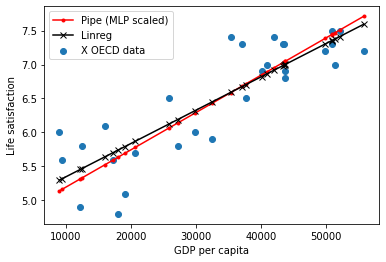

In [13]:
from sklearn.pipeline import Pipeline

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('mlp', mlp)
])

pipe.fit(X,y)
PlotModels(pipe, linreg, X, y, name_model1="Pipe (MLP scaled)", name_model2="Linreg")

### Qc:

In this exercise the `MinMaxScaler` were to be compared to the `StandardScaler`. The results were to be compared to each other with outliers in mind.

A comparison of the results can be seen below the code cell.

Pipe1 (MLP, MinMax Scaled).score(X, y)=0.73
Pipe2 (MLP, StandardScaler).score(X, y)=0.76
Max in X: 55805.204000000005
Min in X: 9054.914
Mean in X: 33391.74913793103
Std in X: 14395.272687078264
 
2*Std+mean in X: 62182.29451208756
2*Std-mean in X: 4601.203763774502


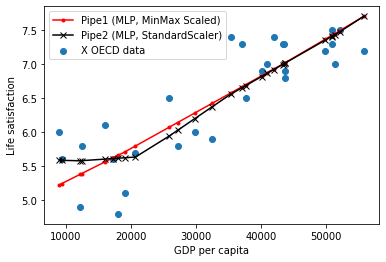

In [15]:
from sklearn.preprocessing import StandardScaler

mlp2 = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp2)
])
pipe.fit(X,y)
pipe2.fit(X,y)


PlotModels(pipe, pipe2, X, y, name_model1="Pipe1 (MLP, MinMax Scaled)", name_model2="Pipe2 (MLP, StandardScaler)")

print(f"Max in X: {X.max()}")
print(f"Min in X: {X.min()}")
print(f"Mean in X: {X.mean()}")
print(f"Std in X: {X.std()}")
print(" ")
print(f"2*Std+mean in X: {2*X.std()+X.mean()}")
print(f"2*Std-mean in X: {-2*X.std()+X.mean()}")

### Qc continued:

There is a fundamental problem with mix-max scalers. The problem is that the scale will be heavily affected by outliers in cases where the outlier is significantly larger or smaller than the majority of the data-points.

After consulting lecturer "Henrik Daniel Kjeldsen" we were given a more statistical approach to determining whether there were outliers in the dataset.

In the code cell above it can be seen that the mean in X is $\approx33000$ and standard deviation of $\approx14000$. A general rule of thumb is to categorize an outlier as a data-point with values between $\pm2\cdot\sigma+\mu$, which is values between $\approx62000$ and $\approx4600$. Since the maximum and minimum is between these values it means that we do not have any significant outliers in the dataset.

To back up the point it can be seen from the scores that the models perform nearly identically. Pipe1 has a score $\approx0.72$ and Pipe2 has a score $\approx0.71$.